In [11]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sklearn functions and models
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef

## Logistic regression Grid search

In [12]:
#dt are the 3 drug types for which we run the models 
#select dt to choose drug type

dt = 'stim_add_aggr'

if dt not in ['hall_add_aggr','stim_add_aggr', 'depr_add_aggr']:
    raise ValueError('dt has to be one of: hall_add_aggr, stim_add_aggr, depr_add_aggr')

In [13]:
data = pd.read_csv('../data_processed/data_final_aggregates.csv')
data.drop(columns = ['Unnamed: 0'], axis = 1, inplace = True)
display(data)

,age,education,n_score,e_score,o_score,a_score,c_score,impulsiveness,ss,alcohol,...,ireland,uk,usa,male,female,depr_add_aggr,depr_woa_add_aggr,hall_add_aggr,hall_woc_add_aggr,stim_add_aggr
0,0.49788,-0.05921,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,5,...,0,1,0,0,1,0,0,0,0,0
1,-0.07854,1.98437,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,5,...,0,1,0,1,0,0,0,0,0,1
2,0.49788,-0.05921,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,6,...,0,1,0,1,0,1,0,0,0,0
3,-0.95197,1.16365,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,4,...,0,1,0,0,1,0,0,0,0,0
4,0.49788,1.98437,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,4,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,-0.95197,-0.61113,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,5,...,0,0,1,0,1,1,1,1,1,0
1881,-0.95197,-0.61113,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,5,...,0,0,1,1,0,0,0,2,2,1
1882,-0.07854,0.45468,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,4,...,0,0,1,0,1,2,2,1,0,2
1883,-0.95197,-0.61113,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,5,...,0,0,1,0,1,1,1,2,2,1


In [14]:
substances = ['alcohol','anphet', 'amyl', 'benzo', 'caffeine', 'cannabis', 
              'chocolate', 'cocaine', 'crack', 'ecstasy', 'heroine', 'ketamine', 
              'legal_h', 'lsd', 'meth', 'mushrooms', 'nicotine', 'semer', 'vsa', 'male']

nationality = ['australia', 'canada', 'new_zealand', 'ireland', 'uk', 'usa']

race = ['asian', 'black_asian', 'white_asian','white_black', 'other', 'white', 'other2']

data.drop(columns=substances + race + nationality, inplace=True, axis=1)
data

,age,education,n_score,e_score,o_score,a_score,c_score,impulsiveness,ss,female,depr_add_aggr,depr_woa_add_aggr,hall_add_aggr,hall_woc_add_aggr,stim_add_aggr
0,0.49788,-0.05921,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,1,0,0,0,0,0
1,-0.07854,1.98437,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,0,0,0,0,0,1
2,0.49788,-0.05921,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,0,1,0,0,0,0
3,-0.95197,1.16365,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,1,0,0,0,0,0
4,0.49788,1.98437,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,-0.95197,-0.61113,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,1,1,1,1,1,0
1881,-0.95197,-0.61113,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,0,0,0,2,2,1
1882,-0.07854,0.45468,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,1,2,2,1,0,2
1883,-0.95197,-0.61113,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,1,1,1,2,2,1


Text(0.5, 1.0, 'Stimulants mutual information')

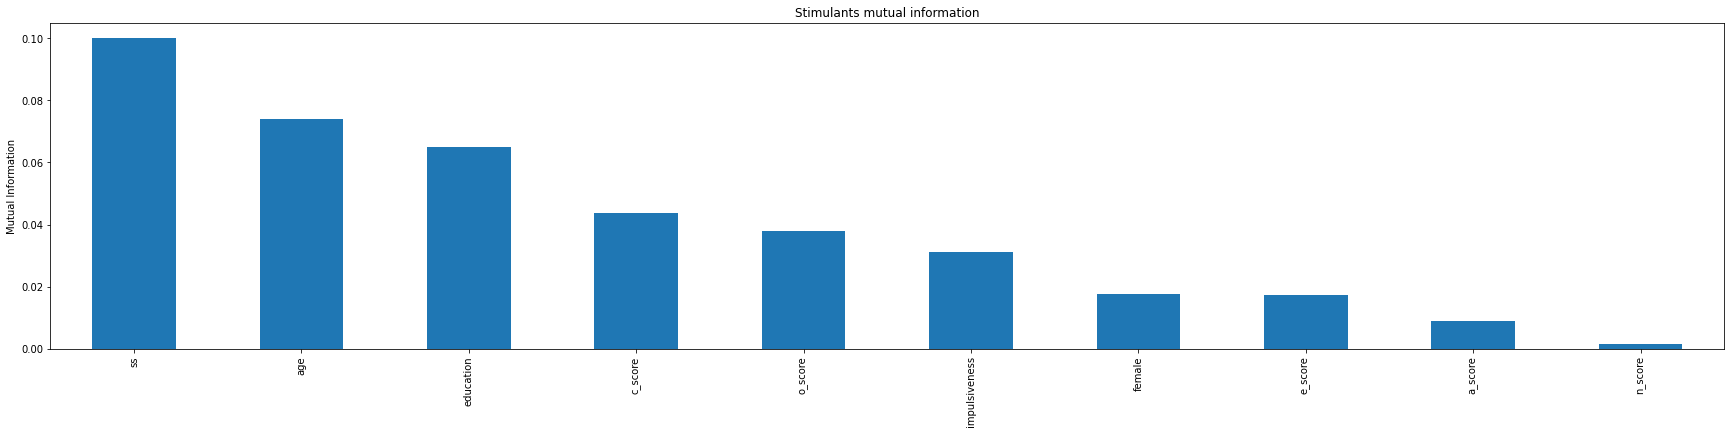

In [15]:
# where more information is stored (I think, does someone know it better?)

data[dt].replace(2,1, inplace = True) #just 2 classes not three
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns = ['hall_add_aggr','stim_add_aggr', 'depr_add_aggr','depr_woa_add_aggr','hall_woc_add_aggr'], axis=1), 
                                                    data[dt], test_size=0.25, random_state=0)

mi = mutual_info_classif(X_train, y_train)
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False).plot.bar(figsize=(30, 6))
plt.ylabel('Mutual Information')
plt.title('Stimulants mutual information')

In [16]:
import imblearn
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)
y_train.value_counts() 

0    868
1    868
Name: stim_add_aggr, dtype: int64

In [17]:
from sklearn.metrics import make_scorer
MCC_scorer = make_scorer(matthews_corrcoef)
MCC_scorer

make_scorer(matthews_corrcoef)

In [18]:
from sklearn.model_selection import GridSearchCV

grid={"C":[0.001,.009,0.01,.09,1,5,10,25], "penalty":['none,'"l1","l2"]} # l1 lasso l2 ridge

#training 
model = LogisticRegression(random_state = 0, max_iter=10000)
logreg_cv = GridSearchCV(model,grid,cv=5, scoring = MCC_scorer)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("MCC :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1, 'penalty': 'l2'}
MCC : 0.5389328187588369


C:\Users\zazzo\.virtualenvs\ML-project-personality-and-drug-consumptio-hpgAsqBM\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\zazzo\.virtualenvs\ML-project-personality-and-drug-consumptio-hpgAsqBM\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\zazzo\.virtualenvs\ML-project-personality-and-drug-consumptio-hpgAsqBM\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, 

## Random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# rerun after XG-Boost
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns = [ 'hall_add_aggr','stim_add_aggr', 'depr_add_aggr','depr_woa_add_aggr','hall_woc_add_aggr'], axis=1), 
                                                    data[dt], test_size=0.3, random_state=0)

oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)
#y_train.value_counts()

In [33]:
rf = RandomForestRegressor(n_estimators = 1000, max_features = 'log2')
rf.fit(X_train, y_train)

y_pred_cont = rf.predict(X_test)

y_pred = [1 if 0.5<i else 0 if i<1.3 else 2 for i in y_pred_cont] #convert to discrete variable 0.6 get the best acuracy

#fig.savefig('../img/' + dt + 'confusion_matrix_stim_random_forest.png') just for the mid term report
#y_pred_cont

In [26]:
max_features = {'auto', 'sqrt', 'log2'}
criterion = {'gini', 'entropy'}

MCC6: 0.4763124448334483


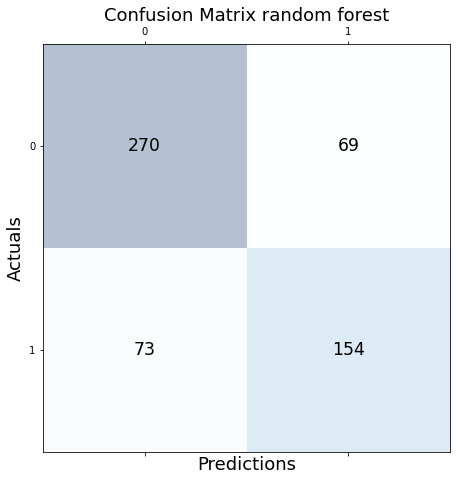

In [34]:
MCC6 = matthews_corrcoef(y_test, y_pred)
print(f"MCC6: {MCC6}")
spec1=9


cm1 = confusion_matrix(y_pred, y_test)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm1, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm1.shape[0]):
    for j in range(cm1.shape[1]):
        ax.text(x=j, y=i,s=cm1[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix random forest', fontsize=18)
plt.show()